José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 3_minimos_cuadrados**
### _No Lineales y Error Cuadrático Medio._
1.- Ajusta por mínimos cuadrados dos modelos de la forma:
* $\log(y) = \log(b) + a\log(x)$, utilizaremos la sustitución $\beta_0=log(b)$ y $f(x)=log(y)$
* $\log(y) = \log(b) + a\log(x) + c\log(x)^2$. De igual forma, realizamos la sustitución: $f(x)=log(y),\beta_0=log(b),\beta_1=log(x),\beta_2=log(x), $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from numpy import log, exp
from scipy.interpolate import interp1d
np.set_printoptions(precision = 7)

_DATOS_

In [2]:
datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)
x = datos[:,0]
y = datos[:,1]
mpoints, = x.shape
lnx=log(datos[:,0])
lny=log(datos[:,1])
xeval = np.linspace(min(lnx),max(lnx), 1000)

**MODELO 1**

In [3]:
A=np.ones((mpoints,2))
A[:,1] = lnx
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@lny)
print('Coeficientes de beta:',beta)
A2=np.ones((1000,2))
A2[:,1] = xeval
ymodlin = exp(A@beta)
yhatmodlin = exp(A2@beta)

Coeficientes de beta: [0.2646476 0.5756426]


**MODELO 2**

In [4]:
coefpoln2 = np.polyfit(lnx,lny,2)
ymodpol = exp(np.polyval(coefpoln2,lnx))
yhatmodpol = exp(np.polyval(coefpoln2,xeval))
print('Coeficientes:',coefpoln2)

Coeficientes: [0.0669549 0.7006292 0.0496202]


**GRÁFICAS DE LOS MODELOS**

Text(0.5, 1.0, 'datos')

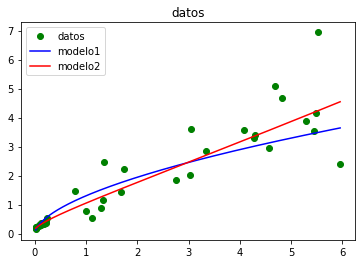

In [5]:
plt.plot(x, y, 'go', exp(xeval), yhatmodlin , 'b-', exp(xeval), yhatmodpol, 'r-')
plt.legend(['datos', 'modelo1', 'modelo2'], loc='best')
plt.title('datos')

**ECM**

In [6]:
ECM_M1=1/(y.shape[0]-1)*sum((y-ymodlin)**2)
ECM_M2=1/(y.shape[0]-1)*sum((y-ymodpol)**2)
print('El error cuadrático medio para el modelo1 ES:',ECM_M1)
print('El error cuadrático medio para el modelo2 cuadrático es:',ECM_M2)

El error cuadrático medio para el modelo1 ES: 0.702828934313711
El error cuadrático medio para el modelo2 cuadrático es: 0.5640028845042063
